In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

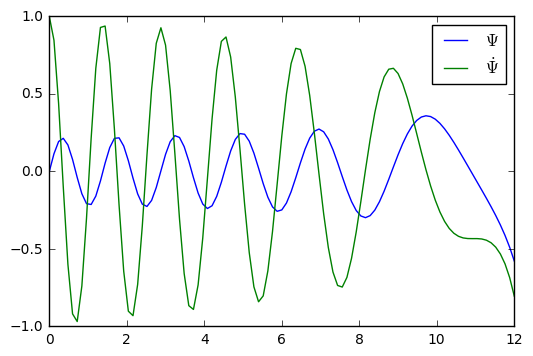

In [2]:
E = 11 # constant energy
y0 = [0.0, 1.0] # inital psi and psi'
x = np.linspace(0, 12, 101) # position

# time-independent schroedinger's equation with semi-infinite V
def tise(y, x, E):
    psi, phi = y # phi is dpsi/dx
    dydx = [phi, 2*(x*psi - E*psi)]
    return dydx

# numerical solution of TISE
sol = odeint(tise, y0, x, args=(E,))

# plot psi over psi'
plt.plot(x, sol[:, 0], 'b', label='$\Psi$')
plt.plot(x, sol[:, 1], 'g', label="$\dot{\Psi}$")
plt.legend(loc='best')

plt.show()